<a href="https://colab.research.google.com/github/liviaferne/crypto-frequency-analysis/blob/main/Projeto_de_Criptoan%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import log10
import random
import pandas as pd

# Fazer o upload do arquivo com texto criptografado (encoded.txt)
# e arquivo quadgrams.txt

# Diretório para organização
!mkdir -p arquivos
!mv encoded.txt quadgrams.txt arquivos/

# **Transformação de binário para caractere**

In [ ]:
# Gera vetor com binários
def split_texto():
  binarios = []
  with open("arquivos/encoded.txt", "r") as f:
    conteudo = f.read()
    entradas = conteudo.split(" ")
    for entrada in entradas:
      if entrada:
        binarios.append(entrada)
    return binarios

lista_binarios = split_texto()

# -----------------------------------------------

# Converte binários em caracteres
def binary_to_char(lista):
  lista_char = []
  for item in lista:
    valor_int = int(item, 2)
    valor_char = chr(valor_int)
    lista_char.append(valor_char)
  return lista_char

lista_caracteres = binary_to_char(lista_binarios)

# -----------------------------------------------

# Obtém texto cifrado (com espaço)
def get_texto(lista_char):
  texto = ""
  for char in lista_char:
    texto += char
  return texto

texto_cifrado = get_texto(lista_caracteres)
print("Mensagem cifrada: "+texto_cifrado)
print("Tamanho: ", len(texto_cifrado))

# -----------------------------------------------

# Obtém texto cifrado (sem espaço)
def get_texto_sem_espaco(texto_cifrado):
  texto = ""
  for char in texto_cifrado:
    if(char != " "):
      texto += char
  return texto
texto_cifrado_se = get_texto_sem_espaco(texto_cifrado)

Mensagem cifrada: VCO ATD HO SOTMO VCO OPJKWITVNWZ WG VCO SWMQWM NM VCO ATD HO VCIOTVOZ VCO SWZVNZUNZR WG WUI MJOSNOM NZ VCTV XKOTY HWIKA TIQM XOTINZR IOMWUISO CUZRID JOWJKO TZA ZTVNWZM HWUKA XO JIWZO VW TSV WZ VCONI KWH SWZVITSVOA JIOLUANSOM TZA HWUKA CTBO MOOZ VCO KTMV RTMJ WG CUQTZ OZKNRCVOZQOZV UZVNK VCO INMO WG T BNMNWZTID ZOH SUKVUIO VCTV WZSO TRTNZ OQXITSOM VCO SWMQNS JOIMJOSVNBO T JOIMJOSVNBO NZ HCNSC HO TIO WZO GNVVNZR ZONVCOI TXWBO ZWI XOKWH XUV HNVCNZ
Tamanho:  448


# **Código auxiliar**
  - Cálculo do score do texto (uso dos quadgrams)

In [ ]:
'''
Allows scoring of text using n-gram probabilities
17/07/12
'''
class ngram_score(object):
    def __init__(self,ngramfile,sep=' '):
        ''' load a file containing ngrams and counts, calculate log probabilities '''
        self.ngrams = {}
        for line in open(ngramfile).readlines():
            key,count = line.split(sep)
            self.ngrams[key] = int(count)
        self.L = len(key)
        self.N = sum(self.ngrams.values())
        #calculate log probabilities
        for key in self.ngrams.keys():
            self.ngrams[key] = log10(float(self.ngrams[key])/self.N)
        self.floor = log10(0.01/self.N)

    def score(self,text):
        ''' compute the score of text '''
        score = 0
        ngrams = self.ngrams.__getitem__
        for i in range(len(text)-self.L+1):
            if text[i:i+self.L] in self.ngrams: score += ngrams(text[i:i+self.L])
            else: score += self.floor
        return score

score_quadgrams = ngram_score("arquivos/quadgrams.txt")

In [ ]:
# Score do texto cifrado
print("Texto cifrado: " + texto_cifrado_se)
score_cifrado = score_quadgrams.score(texto_cifrado_se)
print("Score:", score_cifrado)

Texto cifrado: VCOATDHOSOTMOVCOOPJKWITVNWZWGVCOSWMQWMNMVCOATDHOVCIOTVOZVCOSWZVNZUNZRWGWUIMJOSNOMNZVCTVXKOTYHWIKATIQMXOTINZRIOMWUISOCUZRIDJOWJKOTZAZTVNWZMHWUKAXOJIWZOVWTSVWZVCONIKWHSWZVITSVOAJIOLUANSOMTZAHWUKACTBOMOOZVCOKTMVRTMJWGCUQTZOZKNRCVOZQOZVUZVNKVCOINMOWGTBNMNWZTIDZOHSUKVUIOVCTVWZSOTRTNZOQXITSOMVCOSWMQNSJOIMJOSVNBOTJOIMJOSVNBONZHCNSCHOTIOWZOGNVVNZRZONVCOITXWBOZWIXOKWHXUVHNVCNZ
Score: -2915.4328674892577


<br><br>
# **Cifra de César**

- Correspondência por shifts no alfabeto (26 casos possíveis)
- Como resultado, a Cifra de César não decifra o texto

In [ ]:
def cifra_cesar_decifrar(texto, score_cifrado):
  melhor_score = 0
  melhor_texto = ""
  melhor_shift = 0
  resultados = {}
  for shifts in range(26):
    texto_com_shifts = ""
    for c in texto:
      valor_int = ord(c)
      novo_valor = ((valor_int - shifts - 65) % 26)+65
      novo_char = chr(novo_valor)
      texto_com_shifts += novo_char
    novo_score = score_quadgrams.score(texto_com_shifts)
    resultados[shifts] = novo_score
    if(novo_score > score_cifrado):
      melhor_score = novo_score
      melhor_texto = texto_com_shifts
      melhor_shift = shifts
  if(melhor_score != 0):
    print(f"Melhor score por Cifra de César: {melhor_score} com {melhor_shift} shifts")
    print(f"Mensagem: {melhor_texto}")
  return resultados

resultados_cesar = cifra_cesar_decifrar(texto_cifrado_se, score_cifrado)

Melhor score por Cifra de César: -2620.5759291118206 com 21 shifts
Mensagem: AHTFYIMTXTYRTAHTTUOPBNYASBEBLAHTXBRVBRSRAHTFYIMTAHNTYATEAHTXBEASEZSEWBLBZNROTXSTRSEAHYACPTYDMBNPFYNVRCTYNSEWNTRBZNXTHZEWNIOTBOPTYEFEYASBERMBZPFCTONBETABYXABEAHTSNPBMXBEANYXATFONTQZFSXTRYEFMBZPFHYGTRTTEAHTPYRAWYROBLHZVYETEPSWHATEVTEAZEASPAHTNSRTBLYGSRSBEYNIETMXZPAZNTAHYABEXTYWYSETVCNYXTRAHTXBRVSXOTNROTXASGTYOTNROTXASGTSEMHSXHMTYNTBETLSAASEWETSAHTNYCBGTEBNCTPBMCZAMSAHSE


In [ ]:
tabela_cesar = pd.DataFrame(list(resultados_cesar.items()), columns=["Shifts", "Score"])
display(tabela_cesar)

,Shifts,Score
0,0,-2915.432867
1,1,-2943.820458
2,2,-2995.938072
3,3,-3249.534673
4,4,-3029.430735
5,5,-3162.652742
6,6,-2805.127094
7,7,-2883.135294
8,8,-2667.178569
9,9,-3170.320698


<br><br>
# **Cifra de Substituição**

- Implementação de decifragem por substituição monoalfabética

In [ ]:
# Função para decifrar texto
def decrypt_cifra_substituicao(texto, chave):
  texto_decifrado = ""
  for letra in texto:
    if(letra in chave):
      texto_decifrado += chave[letra]
    else:
      texto_decifrado += letra
  return texto_decifrado

### **Análises linguísticas**

- Comparação da frequência das letras do texto cifrado com a frequências das letras do idioma Inglês

In [ ]:
# Análise de frequência de letras
def count_letras(lista):
  alfabeto = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
  frequencias = {letra: 0 for letra in alfabeto}
  cont = 0
  for char in lista:
    if char in frequencias:
      frequencias[char] += 1
      cont += 1
  for char in frequencias:
    if cont > 0:
      frequencias[char] = round(frequencias[char]/cont, 5)
  return frequencias

# Frequências em ordem decrescente
frequencias_char = sorted(count_letras(lista_caracteres).items(), key=lambda freq: freq[1], reverse=True)

# -----------------------------------------------

# Frequência relativa das letras no idioma inglês (decrescente)
# Retirado de https://mathcenter.oxford.emory.edu/site/math125/englishLetterFreqs/
freq_ingles = [
    ('E', 0.12702), ('T', 0.09056), ('A', 0.08167), ('O', 0.07507), ('I', 0.06966), ('N', 0.06749), ('S', 0.06327), ('H', 0.06094), ('R', 0.05987),
    ('D', 0.04253), ('L', 0.04025), ('C', 0.02782), ('U', 0.02758), ('M', 0.02406), ('W', 0.02360), ('F', 0.02228), ('G', 0.02015), ('Y', 0.01974),
    ('P', 0.01929), ('B', 0.01492), ('V', 0.00978), ('K', 0.00772), ('J', 0.00153), ('X', 0.00150), ('Q', 0.00095), ('Z', 0.00074)
]

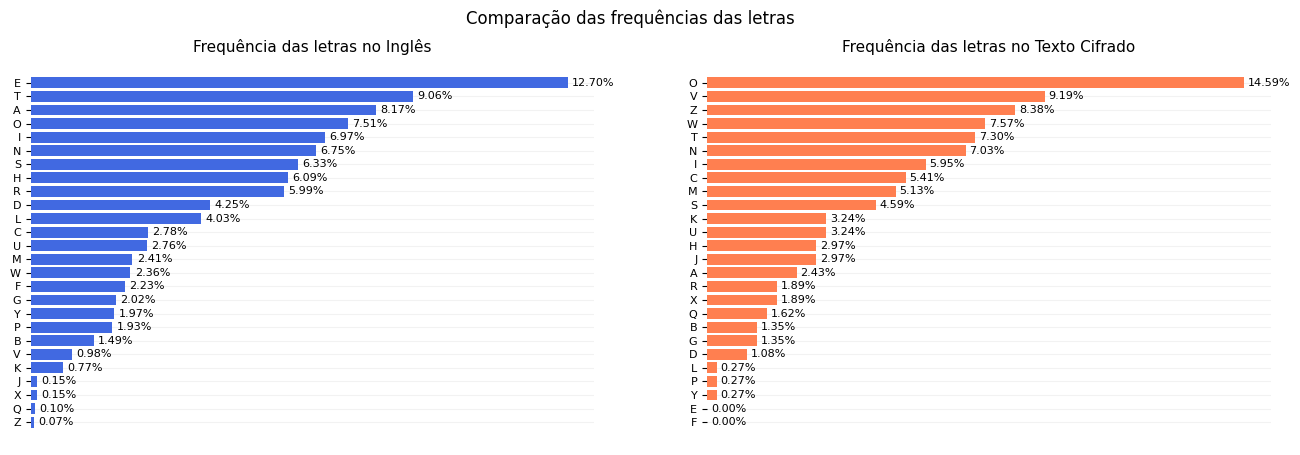

In [ ]:
# Gráficos
dados = [
    (freq_ingles, "Frequência das letras no Inglês", 'royalblue'),
    (frequencias_char, "Frequência das letras no Texto Cifrado", 'coral')
]

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

for ax, (freq_data, titulo, cor) in zip(axs, dados):
  letras = [x[0] for x in freq_data]
  freq = [y[1] for y in freq_data]

  y_pos = np.arange(len(letras))

  ax.barh(y_pos, freq, align='center', color=cor)
  ax.set_yticks(y_pos, labels=letras, fontsize=8)
  ax.invert_yaxis()
  ax.set_title(titulo, fontsize=11)
  ax.xaxis.set_visible(False)
  ax.grid(axis='y', color='gray', alpha=0.1)
  ax.set_axisbelow(True)

  for spine in ax.spines.values():
    spine.set_visible(False)

  for i, v in enumerate(freq):
    ax.text(v + 0.001, i, f"{v*100:.2f}%", va='center', fontsize=8)

fig.suptitle("Comparação das frequências das letras", fontsize=12)
plt.show()

### **Chave inicial - pareamento de frequências**
- A partir das frequências decrescentes obtidas para o texto cifrado, geramos a chave inicial com as letras correspondentes em inglês
- Score aumentou um pouco

In [ ]:
# Pareamento de frequências inglês-texto (desc)
chave_inicial = dict(zip((c[0] for c in frequencias_char), (i[0] for i in freq_ingles)))
print(chave_inicial)

texto_decifrado_inicial = decrypt_cifra_substituicao(texto_cifrado_se, chave_inicial)
print("\nTexto decifrado: " + texto_decifrado_inicial)

score_inicial = score_quadgrams.score(texto_decifrado_inicial)
print("\nScore:", score_inicial)

{'O': 'E', 'V': 'T', 'Z': 'A', 'W': 'O', 'T': 'I', 'N': 'N', 'I': 'S', 'C': 'H', 'M': 'R', 'S': 'D', 'K': 'L', 'U': 'C', 'H': 'U', 'J': 'M', 'A': 'W', 'R': 'F', 'X': 'G', 'Q': 'Y', 'B': 'P', 'G': 'B', 'D': 'V', 'L': 'K', 'P': 'J', 'Y': 'X', 'E': 'Q', 'F': 'Z'}

Texto decifrado: THEWIVUEDEIRETHEEJMLOSITNOAOBTHEDORYORNRTHEWIVUETHSEITEATHEDOATNACNAFOBOCSRMEDNERNATHITGLEIXUOSLWISYRGEISNAFSEROCSDEHCAFSVMEOMLEIAWAITNOARUOCLWGEMSOAETOIDTOATHENSLOUDOATSIDTEWMSEKCWNDERIAWUOCLWHIPEREEATHELIRTFIRMOBHCYIAEALNFHTEAYEATCATNLTHESNREOBIPNRNOAISVAEUDCLTCSETHITOADEIFINAEYGSIDERTHEDORYNDMESRMEDTNPEIMESRMEDTNPENAUHNDHUEISEOAEBNTTNAFAENTHESIGOPEAOSGELOUGCTUNTHNA

Score: -2173.148140919097


### **Otimização**
- Com base na chave inicial, busca-se chaves que melhoram o score do texto.

In [ ]:
# stochastic hill-climbing
melhor_chave = chave_inicial.copy()
melhor_texto = decrypt_cifra_substituicao(texto_cifrado_se, melhor_chave)
melhor_score = score_quadgrams.score(melhor_texto)

for i in range(5000):
  # Troca duas chaves de forma aleatória
  nova_chave = melhor_chave.copy()
  letra1, letra2 = random.sample(list(nova_chave.keys()), 2)
  nova_chave[letra1], nova_chave[letra2] = nova_chave[letra2], nova_chave[letra1]
  # Decifra com nova chave
  novo_texto = decrypt_cifra_substituicao(texto_cifrado_se, nova_chave)
  novo_score = score_quadgrams.score(novo_texto)
  # Substitui caso a nova chave seja melhor
  if(novo_score > melhor_score):
    melhor_chave = nova_chave
    melhor_score = novo_score
    melhor_texto = novo_texto
    print(f"Iteração {i}")
    print(f"Texto: {melhor_texto}")
    print(f"Novo melhor score: {melhor_score}\n")

Iteração 0
Texto: THEWIVUEDEIRETHEEJMLOSITNOAOBTHEDORYORNRTHEWIVUETHSEITEATHEDOATNACNAPOBOCSRMEDNERNATHITGLEIXUOSLWISYRGEISNAPSEROCSDEHCAPSVMEOMLEIAWAITNOARUOCLWGEMSOAETOIDTOATHENSLOUDOATSIDTEWMSEKCWNDERIAWUOCLWHIFEREEATHELIRTPIRMOBHCYIAEALNPHTEAYEATCATNLTHESNREOBIFNRNOAISVAEUDCLTCSETHITOADEIPINAEYGSIDERTHEDORYNDMESRMEDTNFEIMESRMEDTNFENAUHNDHUEISEOAEBNTTNAPAENTHESIGOFEAOSGELOUGCTUNTHNA
Novo melhor score: -2172.4113933863678

Iteração 10
Texto: THEWIVUEDEIRETHEEJMLOSITNOAOBTHEDORFORNRTHEWIVUETHSEITEATHEDOATNACNAPOBOCSRMEDNERNATHITGLEIXUOSLWISFRGEISNAPSEROCSDEHCAPSVMEOMLEIAWAITNOARUOCLWGEMSOAETOIDTOATHENSLOUDOATSIDTEWMSEKCWNDERIAWUOCLWHIYEREEATHELIRTPIRMOBHCFIAEALNPHTEAFEATCATNLTHESNREOBIYNRNOAISVAEUDCLTCSETHITOADEIPINAEFGSIDERTHEDORFNDMESRMEDTNYEIMESRMEDTNYENAUHNDHUEISEOAEBNTTNAPAENTHESIGOYEAOSGELOUGCTUNTHNA
Novo melhor score: -2171.5447444827364

Iteração 19
Texto: THEWIVUEDEIRETHEEJMLOSITNOAOBTHEDORKORNRTHEWIVUETHSEITEATHEDOATNACNAPOBOCSRMEDNERNATHITGLEIXUOSLWISKRGEISNAPSEROCSDEHCAPSV

<br><br>
# **Resultados**

In [ ]:
texto_decifrado = decrypt_cifra_substituicao(texto_cifrado, melhor_chave)
print(texto_decifrado)

THE DAY WE CEASE THE EXPLORATION OF THE COSMOS IS THE DAY WE THREATEN THE CONTINUING OF OUR SPECIES IN THAT BLEAK WORLD ARMS BEARING RESOURCE HUNGRY PEOPLE AND NATIONS WOULD BE PRONE TO ACT ON THEIR LOW CONTRACTED PREJUDICES AND WOULD HAVE SEEN THE LAST GASP OF HUMAN ENLIGHTENMENT UNTIL THE RISE OF A VISIONARY NEW CULTURE THAT ONCE AGAIN EMBRACES THE COSMIC PERSPECTIVE A PERSPECTIVE IN WHICH WE ARE ONE FITTING NEITHER ABOVE NOR BELOW BUT WITHIN


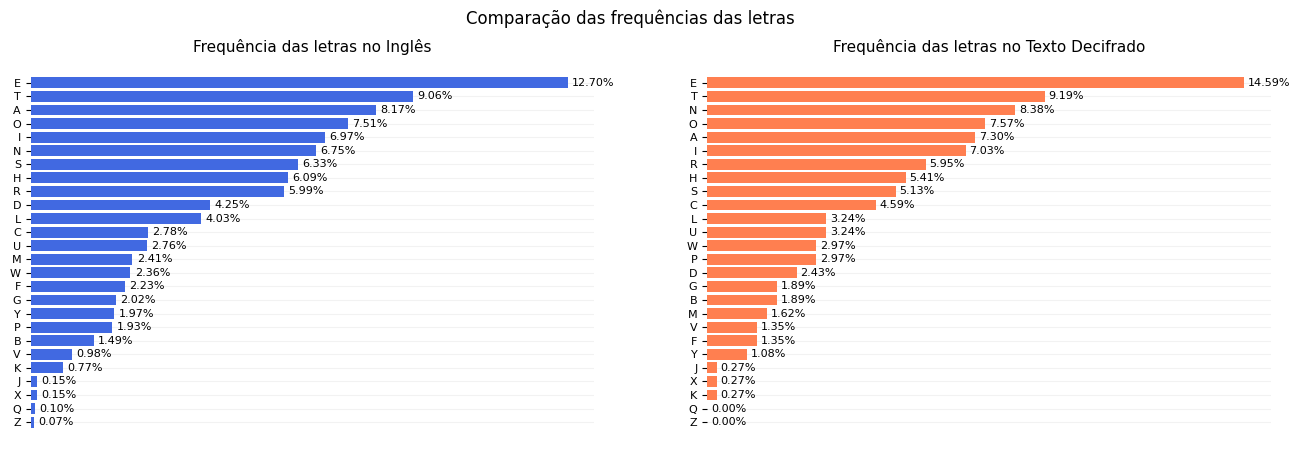

In [ ]:
frequencias_decifrado = list(zip((c for c in melhor_chave.values()), (f for _, f in frequencias_char)))

# Gráficos
dados = [
    (freq_ingles, "Frequência das letras no Inglês", 'royalblue'),
    (frequencias_decifrado, "Frequência das letras no Texto Decifrado", 'coral')
]

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

for ax, (freq_data, titulo, cor) in zip(axs, dados):
  letras = [x[0] for x in freq_data]
  freq = [y[1] for y in freq_data]

  y_pos = np.arange(len(letras))

  ax.barh(y_pos, freq, align='center', color=cor)
  ax.set_yticks(y_pos, labels=letras, fontsize=8)
  ax.invert_yaxis()
  ax.set_title(titulo, fontsize=11)
  ax.xaxis.set_visible(False)
  ax.grid(axis='y', color='gray', alpha=0.1)
  ax.set_axisbelow(True)

  for spine in ax.spines.values():
    spine.set_visible(False)

  for i, v in enumerate(freq):
    ax.text(v + 0.001, i, f"{v*100:.2f}%", va='center', fontsize=8)

fig.suptitle("Comparação das frequências das letras", fontsize=12)
plt.show()
